In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv(r'/content/AppleStore.csv')

In [3]:
#Quick exploration of App Store data
df.head(5)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [4]:
df.shape

(7197, 17)

In [5]:
# Count the occurances of each unique app name
app_count = df['track_name'].value_counts()

duplicate_apps = app_count[app_count>1]

total_duplicates = duplicate_apps.sum() - len(duplicate_apps)

print('Number of duplicate apps ',total_duplicates)

Number of duplicate apps  2


In [6]:
# Identify duplicate rows based on the "track_name" column
duplicate_rows = df[df.duplicated(subset='track_name',keep=False)]

grouped_duplicates = duplicate_rows.groupby('track_name')

for name, group in grouped_duplicates:
  print(f'App:{name}')
  print(group)

App:Mannequin Challenge
      Unnamed: 0          id           track_name  size_bytes currency  price  \
7092       10751  1173990889  Mannequin Challenge   109705216      USD    0.0   
7128       10885  1178454060  Mannequin Challenge    59572224      USD    0.0   

      rating_count_tot  rating_count_ver  user_rating  user_rating_ver    ver  \
7092               668                87          3.0              3.0    1.4   
7128               105                58          4.0              4.5  1.0.1   

     cont_rating prime_genre  sup_devices.num  ipadSc_urls.num  lang.num  \
7092          9+       Games               37                4         1   
7128          4+       Games               38                5         1   

      vpp_lic  
7092        1  
7128        1  
App:VR Roller Coaster
      Unnamed: 0          id         track_name  size_bytes currency  price  \
3319        4000   952877179  VR Roller Coaster   169523200      USD    0.0   
5603        7579  1089824278  V

In [7]:
# sorting and removing duplicates based on "track_name" while retaining the one with highest rating
df2 = df.sort_values(by='track_name', ascending=False).drop_duplicates(subset='track_name',keep='first')

In [8]:
df2.shape

(7195, 17)

In [9]:
# Paid apps
df_paid = df[df['price']!=0]
df_paid.shape

(3141, 17)

In [10]:
# Defining pattern to match english-like text

import re

pattern = r'[\w\s.,!?;+*-_/()\[\]{}@#%&]+$'

df_filtered = df2[df2['track_name'].str.match(pattern)]
df_filtered.shape


(6186, 17)

In [11]:
apple_prime_genre_counts = df_filtered['prime_genre'].value_counts(normalize=True)

top_10_prime_genres = apple_prime_genre_counts.head(10).reset_index()
top_10_prime_genres

,prime_genre,proportion
0,Games,0.540737
1,Entertainment,0.072583
2,Education,0.060782
3,Photo & Video,0.053185
4,Utilities,0.036857
5,Productivity,0.025865
6,Health & Fitness,0.023925
7,Social Networking,0.022632
8,Music,0.021662
9,Lifestyle,0.018105


/tmp/ipython-input-39-1042477791.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='prime_genre', y='proportion',data=top_10_prime_genres, palette=sns.color_palette('viridis'),width=0.5)
/tmp/ipython-input-39-1042477791.py:4: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  barplot = sns.barplot(x='prime_genre', y='proportion',data=top_10_prime_genres, palette=sns.color_palette('viridis'),width=0.5)


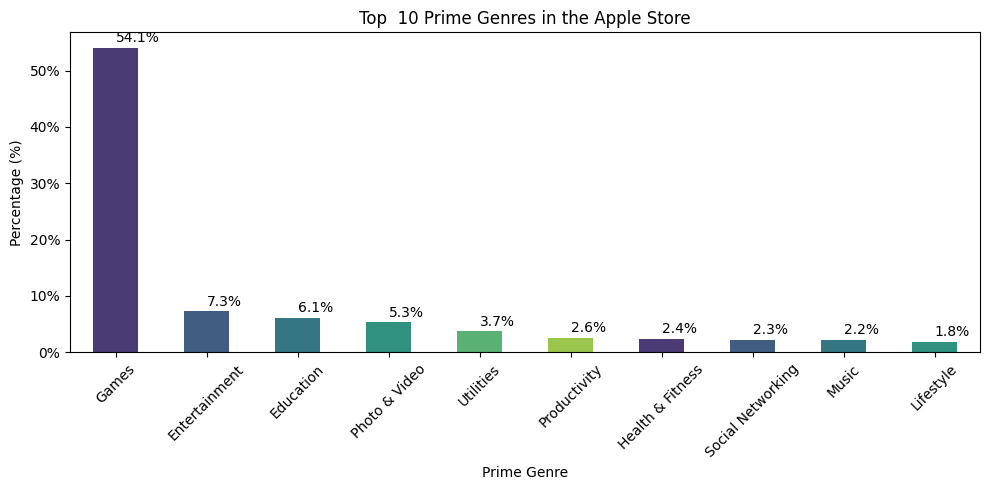

In [39]:
import matplotlib.ticker as mtick

plt.figure(figsize=(10,5))
barplot = sns.barplot(x='prime_genre', y='proportion',data=top_10_prime_genres, palette=sns.color_palette('viridis'),width=0.5)

for p in barplot.patches:
  height = p.get_height()
  barplot.annotate(f'{height*100:.1f}%',(p.get_x()+p.get_width()/2, height+0.01))

plt.xlabel('Prime Genre')
plt.ylabel('Percentage (%)')
plt.title('Top  10 Prime Genres in the Apple Store')
plt.xticks(rotation=45)

barplot.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.tight_layout()
plt.show()

/tmp/ipython-input-33-3607407056.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_count_tot.index, y=avg_rating_count_tot.values,width=0.5,palette=sns.color_palette('viridis'))
/tmp/ipython-input-33-3607407056.py:4: UserWarning: 
The palette list has fewer values (6) than needed (23) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=avg_rating_count_tot.index, y=avg_rating_count_tot.values,width=0.5,palette=sns.color_palette('viridis'))


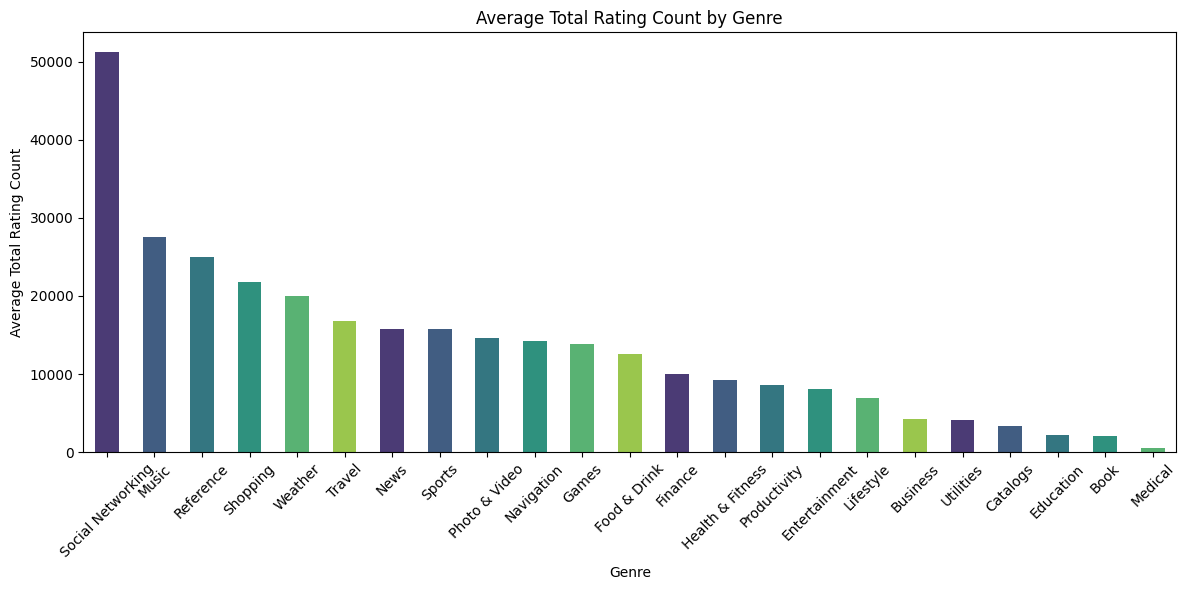

In [33]:
# Average Total rating count by Genre

avg_rating_count_tot = df_filtered.groupby('prime_genre')['rating_count_tot'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=avg_rating_count_tot.index, y=avg_rating_count_tot.values,width=0.5,palette=sns.color_palette('viridis'))
plt.title('Average Total Rating Count by Genre')
plt.ylabel('Average Total Rating Count')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-32-2850958181.py:5: UserWarning: 
The palette list has fewer values (6) than needed (23) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=avg_user_rating.index, y=avg_user_rating.values,width=0.5,palette=sns.color_palette('viridis'),hue=avg_user_rating.index )


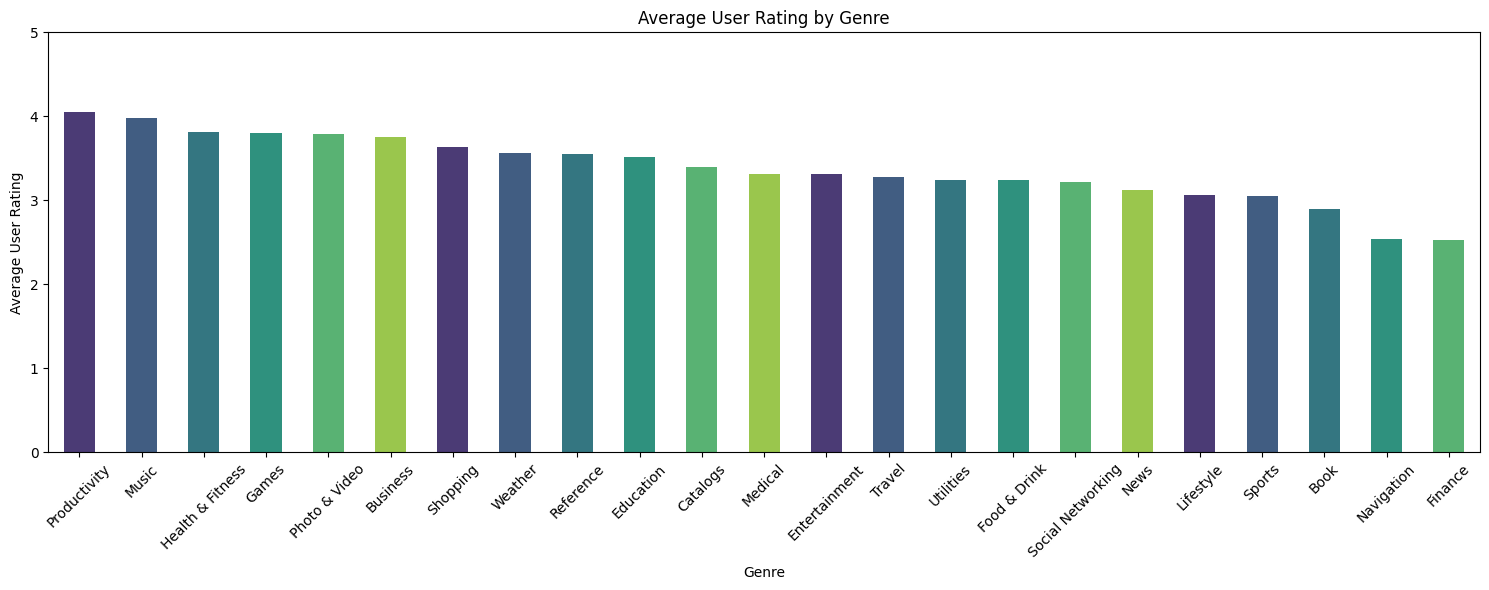

In [32]:

# Average User Rating by Genre
avg_user_rating = df_filtered.groupby('prime_genre')['user_rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(15,6))
sns.barplot(x=avg_user_rating.index, y=avg_user_rating.values,width=0.5,palette=sns.color_palette('viridis'),hue=avg_user_rating.index )
plt.title('Average User Rating by Genre')
plt.ylabel('Average User Rating')
plt.xlabel('Genre')
plt.ylim(0, 5)  # Ratings are typically on a 0-5 scale
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


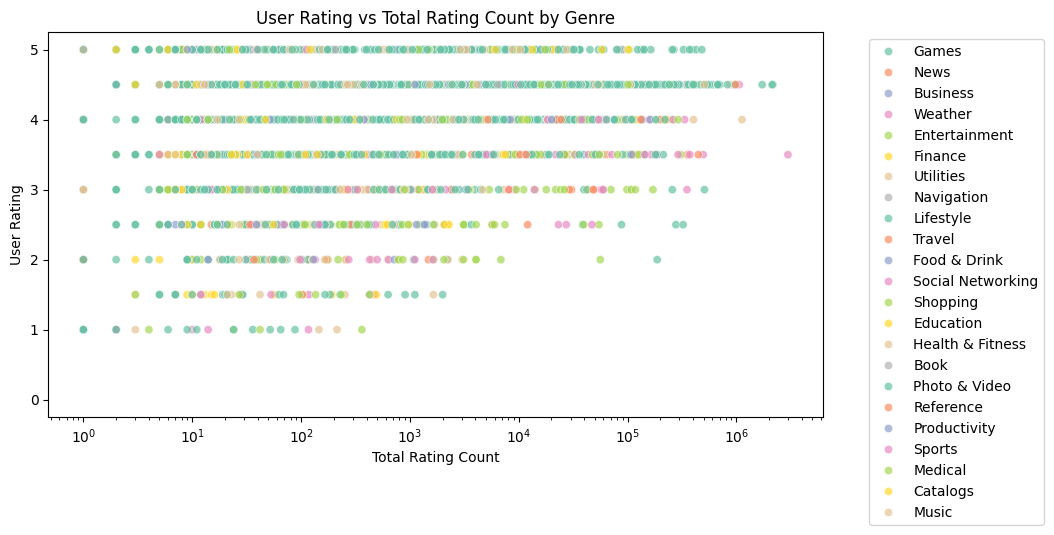

In [47]:
#User Rating vs Total Rating Count by Genre
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_filtered, x='rating_count_tot', y='user_rating', hue='prime_genre', alpha=0.7,palette='Set2')
plt.title('User Rating vs Total Rating Count by Genre')
plt.xlabel('Total Rating Count')
plt.ylabel('User Rating')
plt.xscale('log')  # Log scale can help visualize skewed data
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()